In [35]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import readVCF
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import pandas.plotting as ppl
from sklearn import preprocessing
import re
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
plt.style.use('classic')

### Annotation of callsets

In [38]:
%%bash
~/projects/bsm/src/readVCF.py -h
if false; then
# run script with default options
~/projects/bsm/src/readVCF.py
fi

usage: readVCF.py [-h] [-d DIR] [-l VCFLIST]

optional arguments:
  -h, --help            show this help message and exit
  -d DIR, --dir DIR     main VCF directory
                        (/home/attila/projects/bsm/results/calls/)
  -l VCFLIST, --vcflist VCFLIST
                        list of samples and VCF files
                        (/big/results/bsm/calls/filtered-vcfs.tsv)
Welcome, Attila Jones!



### Loading callsets

In [39]:
calls = readVCF.readVCFs()
calls

Welcome, Attila Jones!



,CHROM,POS,REF,ALT,QUAL,FILTER/PASS,FILTER/HC,FILTER/EXT,AC,AF,...,otherMedicalDetail,mannerOfDeath,PMICertain,Genotyping_Sample_ID,Cluster,EV.1,EV.2,EV.3,EV.4,EV.5
0,1,43788142,C,A,227.40,HC;PASS/PASS,HC;PASS/HC,HC;PASS/EXT,3,0.06,...,NaN,NaN,NaN,MSSM_172,B,0.019706,-0.075140,0.003492,-0.015932,-0.006081
1,1,82063741,C,T,71.18,HC;PASS/PASS,HC;PASS/HC,HC;PASS/EXT,1,0.02,...,NaN,NaN,NaN,MSSM_172,B,0.019706,-0.075140,0.003492,-0.015932,-0.006081
2,1,166060224,G,A,73.68,HC;PASS/PASS,HC;PASS/HC,HC;PASS/EXT,1,0.02,...,NaN,NaN,NaN,MSSM_172,B,0.019706,-0.075140,0.003492,-0.015932,-0.006081
3,2,283678,C,A,100.99,HC;PASS/PASS,HC;PASS/HC,HC;PASS/EXT,2,0.04,...,NaN,NaN,NaN,MSSM_172,B,0.019706,-0.075140,0.003492,-0.015932,-0.006081
4,2,99427525,C,T,101.86,HC;PASS/PASS,HC;PASS/HC,HC;PASS/EXT,2,0.04,...,NaN,NaN,NaN,MSSM_172,B,0.019706,-0.075140,0.003492,-0.015932,-0.006081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,19,29600767,C,T,79.79,HC;PASS/PASS,HC;PASS/HC,HC;PASS/EXT,1,0.02,...,NaN,NaN,NaN,PITT_917,E,0.021532,0.004611,0.001182,0.035402,-0.005080
38,19,58291104,C,T,77.85,HC;PASS/PASS,HC;PASS/HC,HC;PASS/EXT,2,0.04,...,NaN,NaN,NaN,PITT_917,E,0.021532,0.004611,0.001182,0.035402,-0.005080
39,X,5889841,G,A,1084.39,HC;PASS/PASS,HC;PASS/HC,HC;PASS/EXT,10,0.20,...,NaN,NaN,NaN,PITT_917,E,0.021532,0.004611,0.001182,0.035402,-0.005080
40,X,71258041,C,T,99.85,HC;PASS/PASS,HC;PASS/HC,HC;PASS/EXT,2,0.04,...,NaN,NaN,NaN,PITT_917,E,0.021532,0.004611,0.001182,0.035402,-0.005080


In [7]:
repr(list(calls.columns))

"['CHROM', 'POS', 'REF', 'ALT', 'QUAL', 'FILTER/PASS', 'FILTER/HC', 'FILTER/EXT', 'AC', 'AF', 'AN', 'BaseQRankSum', 'DP', 'DS', 'END', 'ExcessHet', 'FS', 'InbreedingCoeff', 'MLEAC', 'MLEAF', 'MQ', 'MQRankSum', 'NEGATIVE_TRAIN_SITE', 'POSITIVE_TRAIN_SITE', 'QD', 'RAW_MQandDP', 'ReadPosRankSum', 'SOR', 'VQSLOD', 'culprit', 'ChromatinState_DLPFC', 'SiPhyLOD', 'SiPhyBranchLen', 'chromatinState_DLPFC', 'evolConstrain', 'Sample', 'Individual ID', 'Tissue', 'Individual Notes', 'Institution', 'Brain ID', 'SCZ Pair', 'BP Pair', 'Changed (used Affy phenotype)', 'Reported Gender', 'Sex', 'Ethnicity', 'Race', 'Genotype Inferred Ancestry', 'ageOfDeath', 'Date of Death', 'Time of Death', 'Time of Death (Military)', 'Autopsy ID', 'Brain Weight (in grams)', 'PMI (in hours)', 'pH', 'Dx', 'primaryDiagnosisDetail', 'Presence or Absence of Dementia (Y/N)', 'CDR', 'Year of Autopsy', 'Neuropath', 'Neuropath desc', 'Gross Diagnosis', 'Benzodiazepines', 'Anticonvulsants', 'AntipsychTyp', 'AntipsychAtyp', 'Ant

Text(0, 0.5, '# samples')

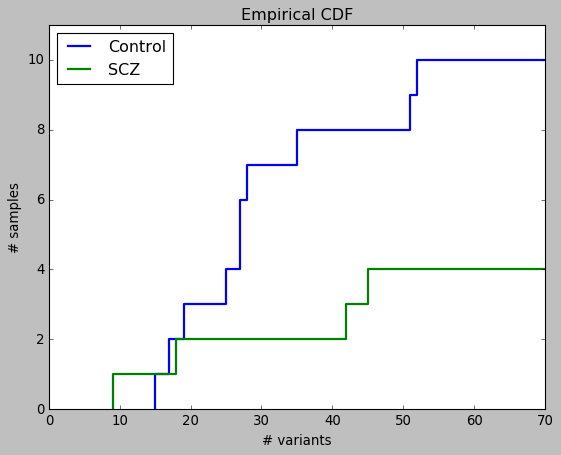

In [8]:
def foo(Dx, ax, xmin=0, xmax=70):
    x = calls.loc[calls['Dx'] == Dx, 'Sample'].value_counts()
    x = x.sort_values()
    ax.step(list(x) + [70], range(len(x) + 1), label=Dx, linewidth=2)
    #df = calls.loc[calls['Dx'] == Dx, :]
    #return(df.groupby('Sample').count()['Dx'])

fig, ax = plt.subplots(figsize=(8, 6))
xmin, xmax = 0, 70
foo('Control', ax)
foo('SCZ', ax)
ax.set_ylim(0, 11)
ax.legend(loc='upper left')
ax.set_title('Empirical CDF')
ax.set_xlabel('# variants')
ax.set_ylabel('# samples')

### Evolutionary constrain

In [9]:
evol_Dx = pd.crosstab(calls['evolConstrain'], calls['Dx'], margins=True)
evol_Dx

Dx,Control,SCZ,All
evolConstrain,,,
False,282,113,395
True,14,1,15
All,296,114,410


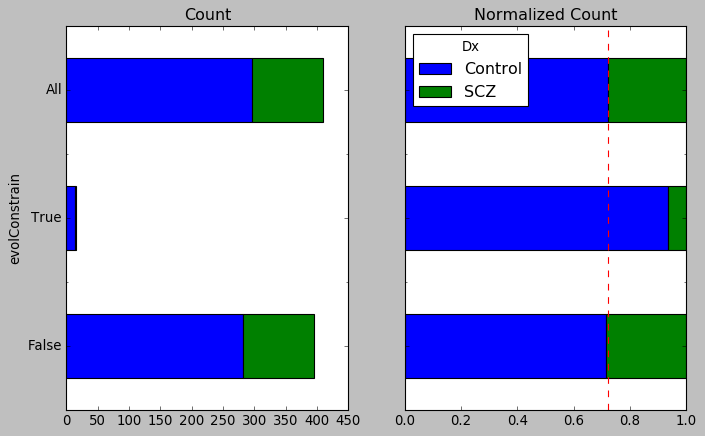

In [10]:
evol_Dx_norm = pd.crosstab(calls['evolConstrain'], calls['Dx'], margins=True, normalize='index')
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(10, 6))
evol_Dx[['Control', 'SCZ']].plot.barh(stacked=True, ax=ax[0], legend=False, title='Count')
ax[1].vlines(evol_Dx_norm.loc['All', 'Control'], *ax[1].get_ylim(), colors='red', linestyles='dashed')
evol_Dx_norm.plot.barh(stacked=True, ax=ax[1], title='Normalized Count')

### Chromatin state in DLPFC

In [11]:
state_Dx = pd.crosstab(calls['chromatinState_DLPFC'], calls['Dx'], margins=True)
state_Dx

Dx,Control,SCZ,All
chromatinState_DLPFC,,,
TssA,1,3,4
TssAFlnk,1,0,1
Tx,8,3,11
TxWk,46,14,60
EnhG,1,0,1
Enh,10,1,11
ZNF/Rpts,0,1,1
Het,4,1,5
TssBiv,1,0,1


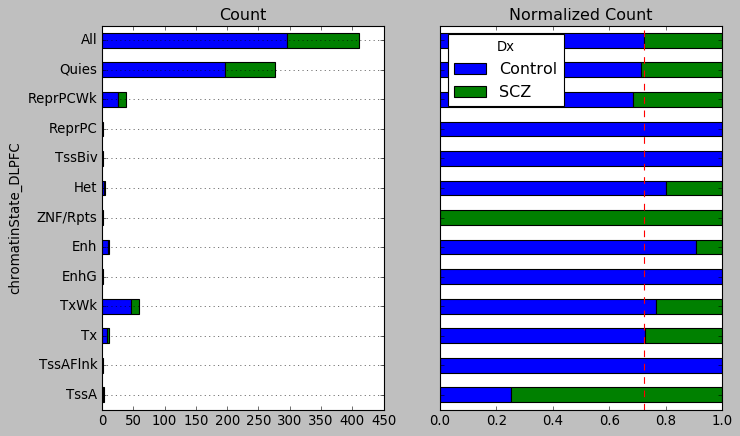

In [12]:
state_Dx_norm = pd.crosstab(calls['chromatinState_DLPFC'], calls['Dx'], normalize='index', margins=True)
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(10, 6))
state_Dx[['Control', 'SCZ']].plot.barh(stacked=True, ax=ax[0], legend=False, title='Count')
ax[0].grid(True, axis='y')
ax[1].vlines(state_Dx_norm.loc['All', 'Control'], *ax[1].get_ylim(), colors='red', linestyles='dashed')
state_Dx_norm.plot.barh(stacked=True, ax=ax[1], title='Normalized Count')

### Allele frequency

(2.5, 0.5)

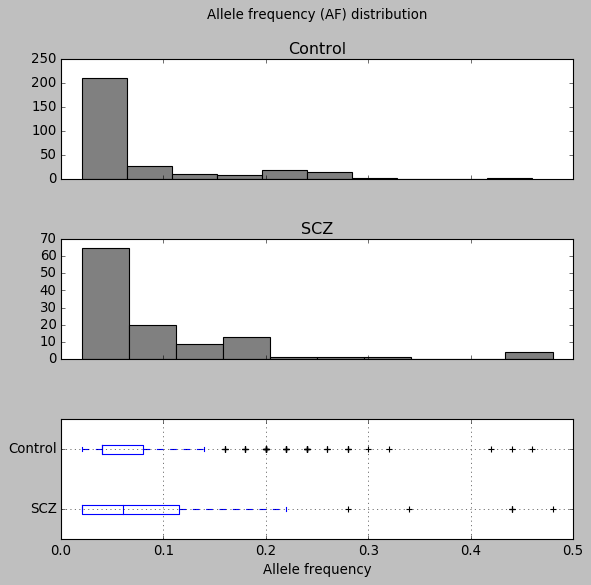

In [13]:
fig, ax = plt.subplots(3, 1, figsize=(8, 8), sharex=True)
calls.hist(column='AF', by='Dx', ax=ax[0:2], grid=True, color='gray')
calls.boxplot('AF', by='Dx', vert=False, ax=ax[2], showfliers=True, color='black')
ax[2].set_xlabel('Allele frequency')
ax[2].set_title('')
fig.suptitle('Allele frequency (AF) distribution')
ax[2].set_ylim(2.5, 0.5)

### Multidimensional view

In [14]:
sel_cols = ['Dx', 'QUAL', 'AF', 'BaseQRankSum', 'DP', 'FS', 'QD', 'ReadPosRankSum', 'SOR', 'VQSLOD', 'ChromatinState_DLPFC']
df = calls.loc[:, sel_cols[1:]]
# First method
df.loc[:, :] = preprocessing.scale(df)
# Second method
#df = (df - df.mean(axis=0)) / df.std(axis=0)
# Third method
#df.loc[:, :] = preprocessing.StandardScaler().fit_transform(df)
df.loc[:, 'Dx'] = calls['Dx']

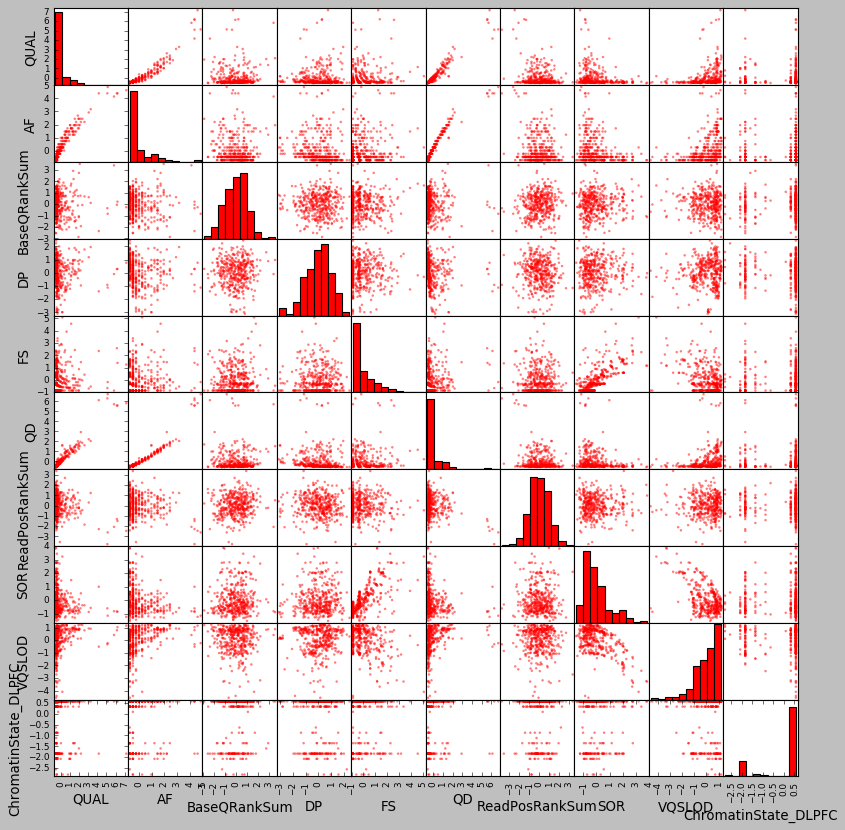

In [15]:
ax = ppl.scatter_matrix(df[sel_cols], diagonal='hist', figsize=(12, 12), color='C2', hist_kwds={'color': 'C2'})

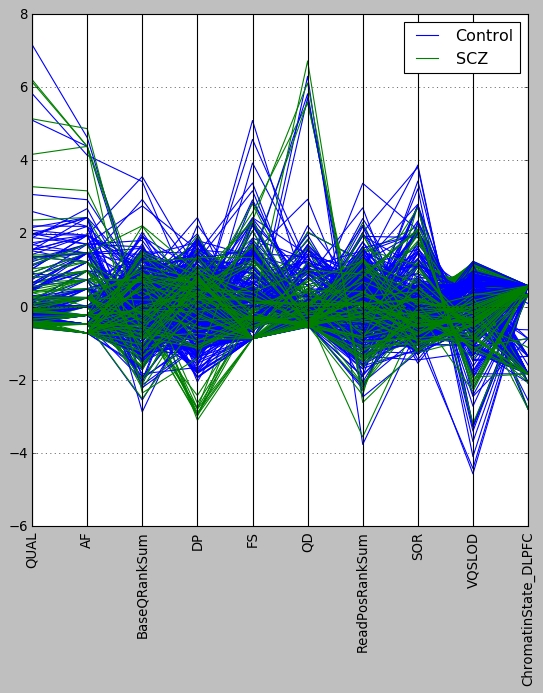

In [16]:
fig, ax = plt.subplots(figsize=(8, 8))
ppl.parallel_coordinates(df, class_column='Dx', ax=ax, color=['C0', 'C1'])
#ppl.parallel_coordinates(df, class_column='Dx', ax=ax, color=['blue', 'orange'])
_ = plt.xticks(rotation=90)

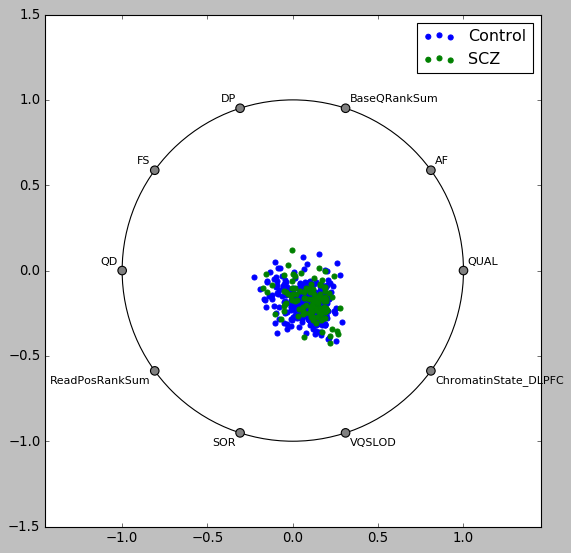

In [17]:
fig, ax = plt.subplots(figsize=(8, 8))
ppl.radviz(calls.loc[:, sel_cols], class_column='Dx', ax=ax, color=['C0', 'C1'])

### Sample based analysis

In [18]:
sel_annot = ['QUAL', 'AF', 'BaseQRankSum', 'DP', 'FS', 'QD', 'ReadPosRankSum', 'SOR', 'VQSLOD']
d = {y: [np.mean, np.std] for y in sel_annot}
sel_clinical = ['ageOfDeath', 'Dx', 'Brain Weight (in grams)', 'PMI (in hours)', 'CDR', 'Year of Autopsy', \
                #'AntipsychTyp', 'AntipsychAtyp', 'Antidepress', 'Lithium', 'Tobacco', 'Alcohol', 'Illicitsub'\
               'BMI (Traditional)', 'EV.1', 'EV.2', 'EV.3', 'EV.4', 'EV.5']
d.update({y: 'first' for y in sel_clinical})
callsg = calls.groupby('Sample')
samples = callsg.aggregate(d)
samples


QUAL                    AF           BaseQRankSum  \
                        mean         std      mean       std         mean   
Sample                                                                      
MSSM_106_NeuN_pl  280.031111  347.241286  0.069630  0.068246     0.419852   
MSSM_109_NeuN_pl  418.878269  666.746281  0.074615  0.092809     0.897538   
MSSM_118_NeuN_pl  201.452222  132.309631  0.102222  0.038006     0.833667   
MSSM_175_NeuN_pl  170.614211   87.025789  0.074737  0.034540     0.565526   
MSSM_179_NeuN_pl  191.420000  169.754944  0.059200  0.040612     0.772680   
MSSM_183_NeuN_pl  180.388889  299.047877  0.049630  0.059322    -0.070630   
MSSM_215_NeuN_pl  244.864667  271.649753  0.076000  0.065553     0.709867   
MSSM_369_NeuN_pl  310.932857  638.577901  0.071429  0.096675     0.936393   
MSSM_373_NeuN_pl  483.582889  799.337417  0.094222  0.104935     0.141022   
MSSM_391_NeuN_pl  169.793529  102.822688  0.060000  0.031623     0.526176   
PITT_010_NeuN_pl  389.102857  295.551408  0.116571  0.074752     0.712629   
PITT_064_NeuN_pl  417.385294  672.684443  0.083137  0.097108     1.539216   
PITT_091_NeuN_pl  528.539444  861.473360  0.121111  0.134334    -0.006611   
PITT_118_NeuN_pl  283.720476  288.308424  0.066190  0.054188     0.841714   

                                    DP                   FS            ...  \
                       std        mean        std      mean       std  ...   
Sample                                                                 ...   
MSSM_106_NeuN_pl  1.966285  207.740741  20.249582  2.173370  2.121117  ...   
MSSM_109_NeuN_pl  2.789790  250.192308  21.796778  2.122981  2.072423  ...   
MSSM_118_NeuN_pl  0.984090   71.111111   4.807402  1.870778  2.181088  ...   
MSSM_175_NeuN_pl  1.545475  128.631579  13.187581  1.439211  2.261266  ...   
MSSM_179_NeuN_pl  1.686531  180.640000  16.839636  4.033400  4.556111  ...   
MSSM_183_NeuN_pl  1.945065  197.111111  14.200036  2.983037  3.223014  ...   
MSSM_215_NeuN_pl  2.294172  175.000000  12.165525  2.225000  2.499338  ...   
MSSM_369_NeuN_pl  1.765149  179.607143  19.607896  1.920679  1.980903  ...   
MSSM_373_NeuN_pl  1.966558  220.644444  17.767636  2.490622  2.863761  ...   
MSSM_391_NeuN_pl  1.666695  160.411765  14.521789  2.581000  1.943874  ...   
PITT_010_NeuN_pl  1.875936  153.085714  17.268420  3.834000  4.326518  ...   
PITT_064_NeuN_pl  1.890985  220.294118  26.971314  3.096510  3.239161  ...   
PITT_091_NeuN_pl  2.078149  154.444444  28.491944  1.932056  2.791710  ...   
PITT_118_NeuN_pl  2.103925  221.452381  16.920477  2.593690  2.894319  ...   

                 Brain Weight (in grams) PMI (in hours)   CDR Year of Autopsy  \
                                   first          first first           first   
Sample                                                                          
MSSM_106_NeuN_pl                  1094.0           11.1   2.0          2012.0   
MSSM_109_NeuN_pl                  1136.0            7.6   0.0          2011.0   
MSSM_118_NeuN_pl                  1482.0           14.8   0.5          2009.0   
MSSM_175_NeuN_pl                  1286.0            8.7   1.0          1994.0   
MSSM_179_NeuN_pl                  1004.0           11.5   0.5          2008.0   
MSSM_183_NeuN_pl                  1168.0           10.8   0.5          2007.0   
MSSM_215_NeuN_pl                   941.0            9.6   4.0          1996.0   
MSSM_369_NeuN_pl                  1100.0            4.2   0.5          2003.0   
MSSM_373_NeuN_pl                  1070.0           26.0   3.0          1999.0   
MSSM_391_NeuN_pl                  1404.0           33.0   0.0          2003.0   
PITT_010_NeuN_pl                  1515.0           24.2   NaN          2003.0   
PITT_064_NeuN_pl                  1470.0           24.4   NaN          2009.0   
PITT_091_NeuN_pl                     NaN           23.5   NaN          1996.0   
PITT_118_NeuN_pl                  1150.0           23.8   NaN          2000.0   

         

In [19]:
# standardization
noDx = ~samples.columns.isin([('Dx', 'first')])
noDx = [(y, 'first') for y in sel_clinical if not re.match('Dx', y)]
df = samples.loc[:, noDx].copy()
df.loc[:, :] = preprocessing.scale(df)
df[('Dx', 'first')] = samples[('Dx', 'first')]
df.columns = [y[0] for y in df.columns]

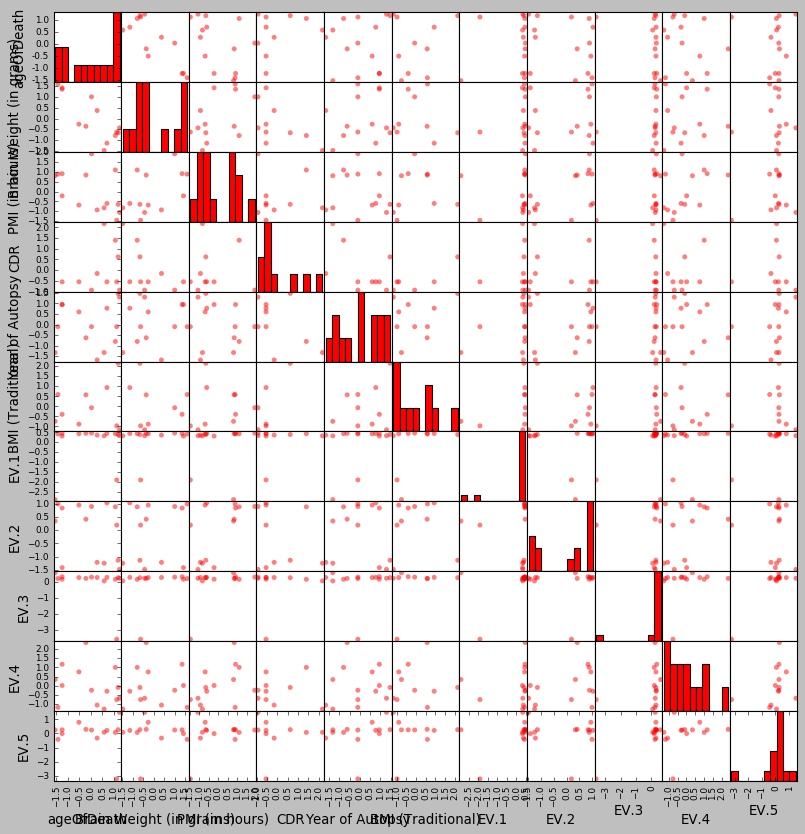

In [20]:
ax = ppl.scatter_matrix(df, diagonal='hist', figsize=(12, 12), color='C2', hist_kwds={'color': 'C2'}, marker='o')

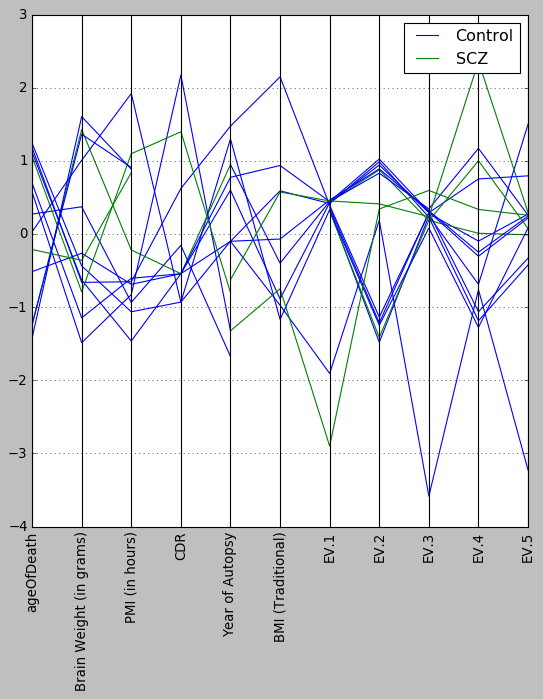

In [21]:
fig, ax = plt.subplots(figsize=(8, 8))
ppl.parallel_coordinates(df, class_column='Dx', ax=ax, color=['C0', 'C1'])
#ppl.parallel_coordinates(df, class_column='Dx', ax=ax, color=['blue', 'orange'])
_ = plt.xticks(rotation=90)

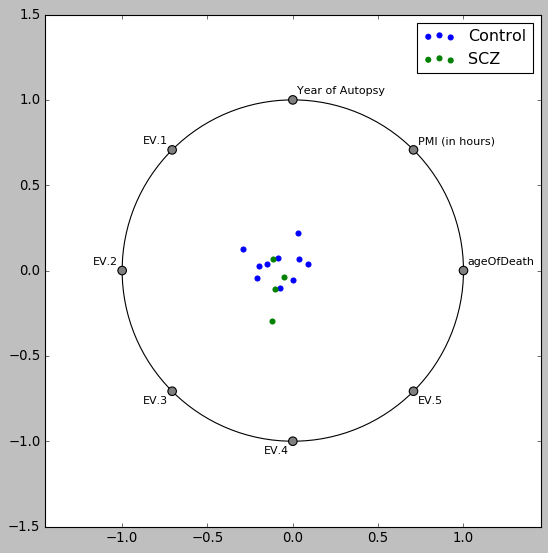

In [22]:
df1 = df.loc[:, ~df.columns.isin(['Brain Weight (in grams)', 'CDR', 'BMI (Traditional)'])]
fig, ax = plt.subplots(figsize=(8, 8))
ppl.radviz(df1, class_column='Dx', ax=ax, color=['C0', 'C1'])

In [23]:
%connect_info

{
  "shell_port": 52135,
  "iopub_port": 50069,
  "stdin_port": 46997,
  "control_port": 41703,
  "hb_port": 49965,
  "ip": "127.0.0.1",
  "key": "b4f65bb4-f94fe6f7dbfed11c02f716cb",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": ""
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-a4b6bd03-db61-4016-9af2-ea8d93174f87.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.
